<a href="https://colab.research.google.com/github/abdalrahmenyousifMohamed/ML/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Generic
import pandas as pd
import numpy as np

# Generic data sets
from sklearn.datasets import make_blobs

#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

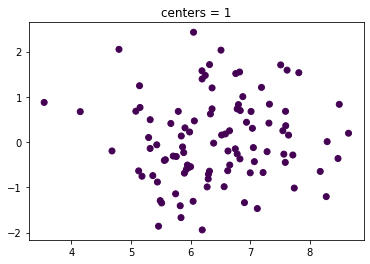

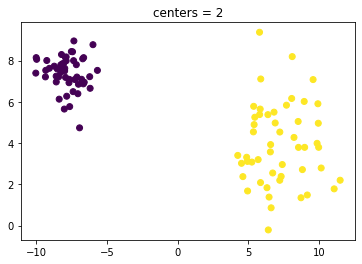

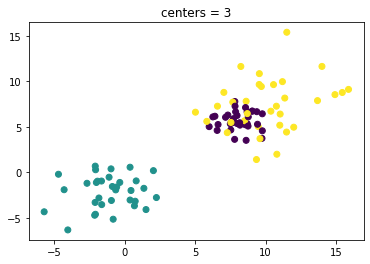

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


# plot 1
X, y = make_blobs(n_features=2, centers=1,cluster_std=[1] , center_box=(10,-10))
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('centers_1.png')
plt.title('centers = 1')

# plot 2    
X, y = make_blobs(n_features=2, centers=2,cluster_std=[1,2])
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('centers = 2')

# plot 3
X, y = make_blobs(n_features=2, centers=3,cluster_std=[1,2,3])
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('centers = 3')

plt.show()

Text(0.5, 1.0, 'centers = 3')

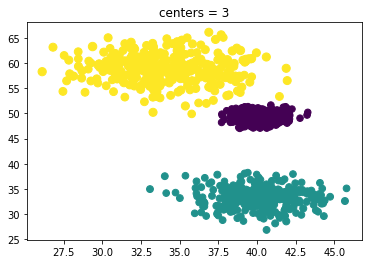

In [3]:
# create an array with 3 clusters in 3-dimensions
X , y = make_blobs(n_samples=1000 , centers=3,n_features=3 , random_state=0,cluster_std=[1,2,3] , center_box=(10,65))
plt.figure()
plt.scatter(X[:, 0], X[:, 1],X[:,2], c=y)

plt.title('centers = 3')

In [4]:
# data normilization , Scaling Transformation (standarize the data)
X = StandardScaler().fit_transform(X)

#Prepare the array in a DataFrame
col_name = ['x' + str(idx) for idx in range(0,X.shape[1])]
df = pd.DataFrame(X,columns=col_name)
df["cluster_label"] = y

df.head()



,x0,x1,x2,cluster_label
0,-0.366353,1.022466,1.166899,2
1,-1.179214,1.318905,1.047407,2
2,0.346441,-1.360488,-0.417740,1
3,0.507115,0.055279,-0.890964,0
4,-0.185192,0.937566,0.930304,2


In [5]:
# Visualize our data
colors = px.colors.sequential.Plasma
colors[0] , colors[1],colors[2] = ['red','green','blue']
fig = px.scatter_3d(df,x='x0',y='x1',z='x2',
                    color=df['cluster_label'].astype(str),
                    color_discrete_sequence=colors,height=500,width=1000
                    )
fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black', 
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)
# data normilization , Scaling Transformation (standarize the data)
X = StandardScaler().fit_transform(X)

In [6]:


#Prepare the array in a DataFrame
col_name = ['x' + str(idx) for idx in range(0,X.shape[1])]
df = pd.DataFrame(X,columns=col_name)
df.head()
colors[0] , colors[1],colors[2] = ['red','green','blue']
fig = px.scatter_3d(df,x='x0',y='x1',z='x2',
                    color_discrete_sequence=colors,height=500,width=1000
                    )
fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black', 
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()


In [7]:
np.array([[1, 2], [3, 4], [5, 6]]).ndim

2

**components_** are mathematically the eigenvectors of the covariance matrix of the centered input matrix. This can be verified by using plain numpy.

#**pca.components_ ** \
is not other than the Loading Scores. With PCA with SVD (singular value decomposition), the principal components are scaled to 1. Imagine the loading scores as a recipe of a cocktail where our PC1 is made with (loading scores for PC1) 0.97 part of Gen1 and 0.242 parts of Gen2, and PC2 is made -0.242 parts of Gen1 and 0.97 of Gen2 (loading scores for PC2).

This is indeed giving us the called Singlular Vector or eigenvector for each component ( the loading scores are the coefficients of each variable for the first component versus the coefficients for the second component)

In [8]:
# Perform PCA (w/o limits on n_components)
pca = PCA()
_ = pca.fit_transform(df[col_name])
PC_component = np.arange(pca.n_components_) + 1

In [9]:
np.arange(pca.n_components_)

array([0, 1, 2])

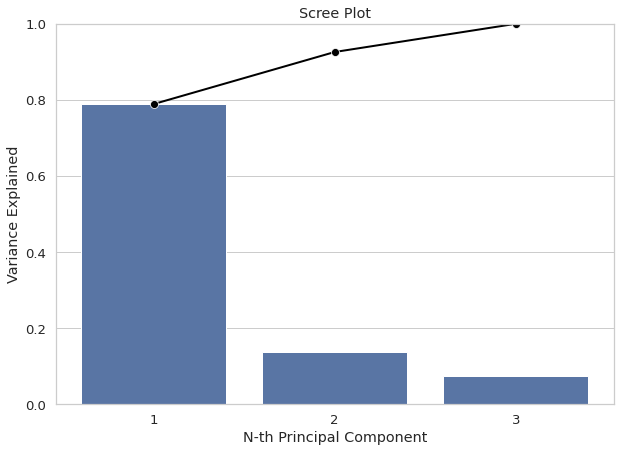

In [10]:
# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=PC_component, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_component-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [11]:
pca.components_

array([[-0.58133196,  0.55167281,  0.59808885],
       [-0.52991283, -0.81449076,  0.2362143 ],
       [ 0.61745085, -0.17961603,  0.765828  ]])

In [12]:
# first PCA
 pca.components_.T[:, 0]

IndentationError: ignored

In [ ]:
# Feature Weight 
# pca.components_ Principal axes in feature space, representing the directions of maximum variance in the data.
_ = sns.heatmap(pca.components_**2,
                yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                xticklabels=list(col_name),
                annot=True,
                fmt='.2f',
                square=True,
                linewidths=0.05,
                cbar_kws={"orientation":"vertical"}

                )

In [ ]:
# perform PCA (Choose n_components to keep)
pca = PCA(n_components=2)
pca_array = pca.fit_transform(df)
print(pca_array)
# covert back to DataFrame for readability
df_pca = pd.DataFrame(data=pca_array)
df_pca.columns = ["PC"+str(col+1) for col in df_pca.columns.values]
df_pca['label'] = y
df_pca.head()

In [ ]:
# Plot pc
_ = sns.set(style='ticks',font_scale=1.2)
fig , ax = plt.subplots(figsize=(11,9))
_ = sns.scatterplot(data=df_pca , x='PC1' , y = 'PC2',hue=df_pca['label'],palette=['red','green','blue'])

In [ ]:
np.random.RandomState(1).rand(2, 2)

 the eigenvectors point in those principal directions and the eigenvalues give you the lengths. The smallest eigenvalues correspond to the thinnest directions having the least variation, so ignoring them (which collapses them flat) loses relatively little information: that's PCA.

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


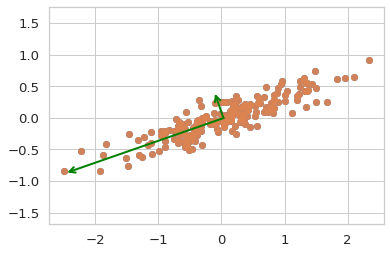

In [17]:
from sklearn.decomposition import PCA
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('tight');
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,color="green")
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.9)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');


These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.

[(-3.0, 3.1),
 Text(0, 0.5, 'component 2'),
 (-5.0, 5.0),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'principal components')]

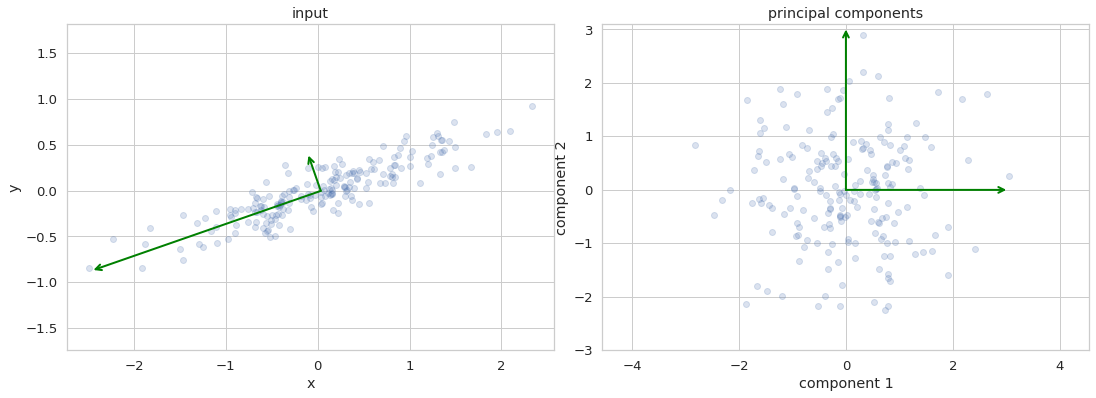

In [15]:
from sklearn.decomposition import PCA
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,color="green")
    ax.annotate('', v1, v0, arrowprops=arrowprops)

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))



In [19]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
#the transformed data has been reduced to single dimension

original shape:    (200, 2)
transformed shape: (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.006064230853995)

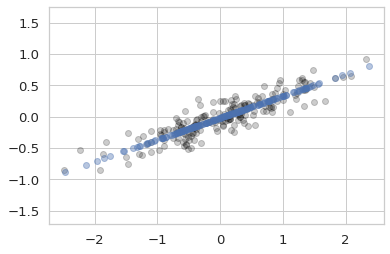

In [21]:
# we can perform the inverse transform of this reduced data and plot it along with the original data
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0] , X[:,1] , alpha=0.2 , color="black")
plt.scatter(X_new[:,0],X_new[:,1] , alpha=0.4)
plt.axis("equal")

the usefulness of the dimensionality reduction may not be entirely apparent in only 2 dimensions , but becomes much more clear when looking at high dimensional data to see this let's take a quick look at the application of PCA to the digits data

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

recall that data consist of 8x8 pixel image , meaning that they are 64-dimensional.to gain some intuition into the relationships between these point we can use PCA to project them to a more manageable number of dimensions say 2

In [24]:
pca = PCA(2) # project from 64 dimensions to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


In [35]:
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

we can now plot the first two principal components of each point to learn about the data

<Figure size 1728x1728 with 0 Axes>

<Figure size 1728x1728 with 0 Axes>

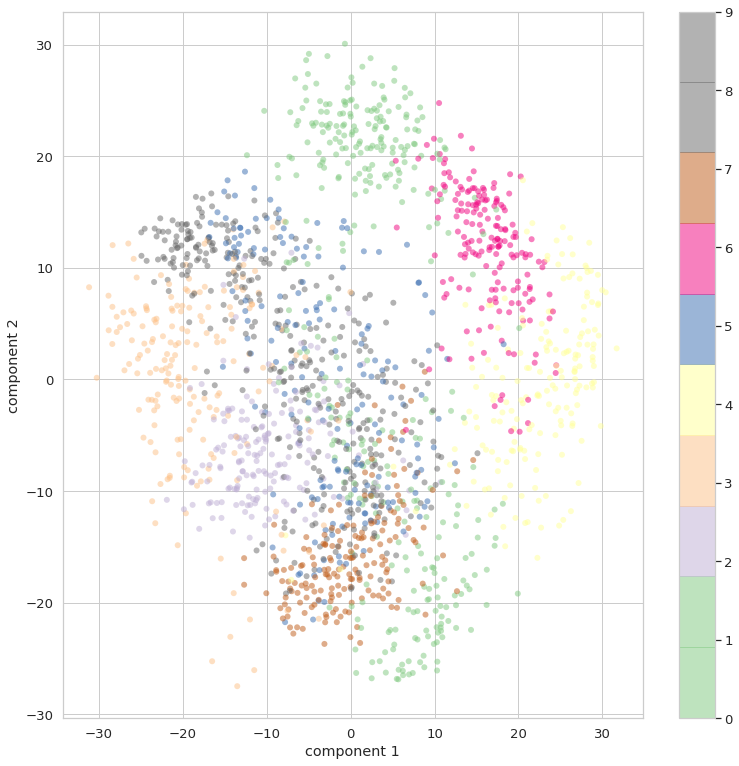

In [46]:
plt.figure(figsize=(13,13))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

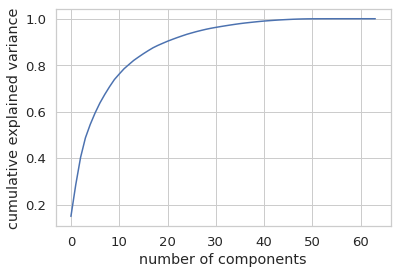

In [56]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Recall what these components mean : the full data is 64-dimensional point cloud , and these points are projection of each data point along 
the direction with the largest variance essentially we have found the optimal stretch and rotation in 64-dimensions space that allows us to see the layout of the digits in two dimensions , and have done this in an unsupervised manner - that is , without reference to the labels

In [49]:
len(digits.data)

1797

In [51]:
np.eye(10,10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [54]:
np.zeros_like([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]) + 0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [55]:
slice(2)

slice(None, 2, None)

In [57]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig

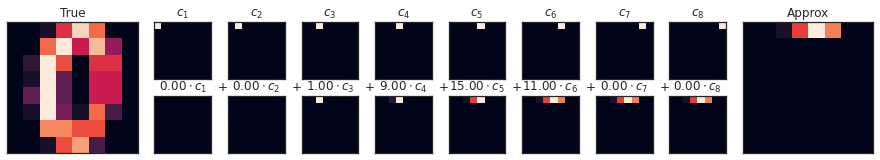

In [60]:
from sklearn.datasets import load_digits

digits = load_digits()
sns.set_style('white')

fig = plot_pca_components(digits.data[10],
                          show_mean=False)



[[-1.25946992e+00  2.12749215e+01 -9.46297841e+00 ... -7.44614423e+00
   3.25523375e+00  2.53628875e+00]
 [ 7.95766542e+00 -2.07687275e+01  4.43953102e+00 ... -6.48705698e+00
   2.12309297e+00 -4.62333624e+00]
 [ 6.99188799e+00 -9.95597913e+00  2.95821248e+00 ... -4.50452194e+00
   1.84645010e+00 -1.63758561e+01]
 ...
 [ 1.08012694e+01 -6.96022198e+00  5.59953217e+00 ... -1.23750418e+01
  -4.48913657e+00 -7.40351720e+00]
 [-4.87219196e+00  1.24240145e+01 -1.01710194e+01 ... -7.32003843e-03
  -2.98321541e+00 -4.35827873e+00]
 [-3.44400800e-01  6.36557032e+00  1.07736193e+01 ... -3.04771982e+00
  -1.16107453e+01  6.91343215e-01]]


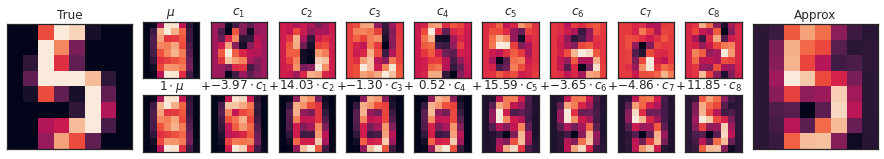

In [117]:
pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)
print(Xproj)
sns.set_style('white')
fig = plot_pca_components(digits.data[-10], Xproj[-10],
                          pca.mean_, pca.components_)

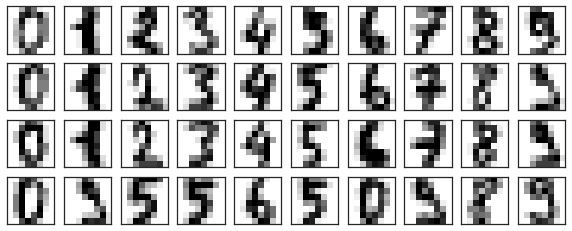

In [71]:
def plot_digits(data):
  fig , axes = plt.subplots(4,10,figsize=(10,4),subplot_kw={'xticks':[],
                                                            'yticks':[]
                                                            
                                                            })
  for i , ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(8,8),cmap='binary',interpolation='nearest',clim=(0,16))
plot_digits(digits.data)
  

# PCA as Noise Filtering
PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise

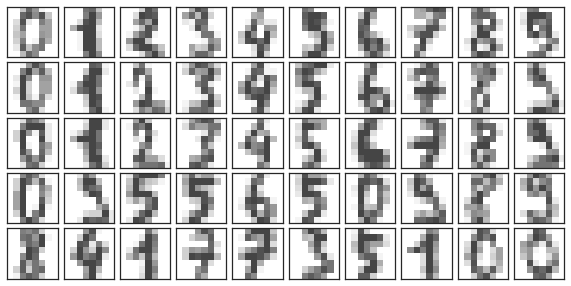

In [111]:
def plot_digits(data):
  fig , axes = plt.subplots(5,10,figsize=(10,5),subplot_kw={'xticks':[],
                                                            'yticks':[]
                                                            
                                                            },gridspec_kw=dict(hspace=0.1,wspace=0.1))
  for i , ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(8,8),cmap='binary',interpolation='nearest',clim=(0,22))
plot_digits(digits.data)
  

add some random noise to create a noisy dataset and replot it

In [87]:
np.random.normal([3,4],4)

array([1.31368487, 4.39151738])

1797


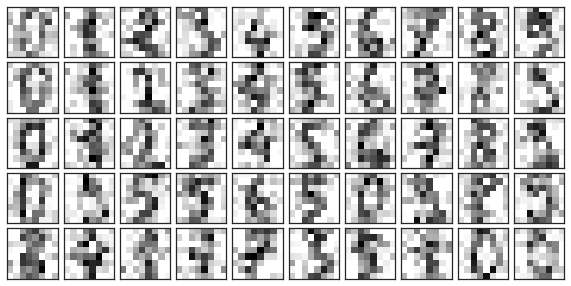

In [89]:
np.random.seed(43)
noisy = np.random.normal(digits.data,4)
print(len(noisy))
plot_digits(noisy)

now it's clear by eye that the images are noisy and contain spurious pixels let's train PCA on the noisy data ,  requesting that projection preserve 50% of the variance

In [112]:
pca = PCA(0.60).fit(noisy)
pca.n_components_

18

here 50% of the variance amount to 12 principal components. now we compute these components and then use the inverse of the transform to reconstruct the filtered digits

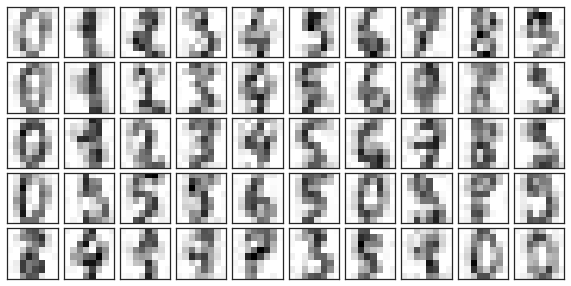

In [110]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

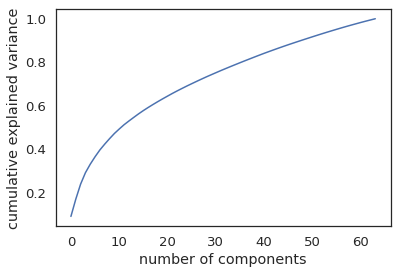

In [118]:
pca = PCA().fit(noisy)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Example: Eigenfaces¶


In [120]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [121]:
print(faces.images.shape)

(1348, 62, 47)


In [134]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(copy=True, iterated_power=3, n_components=150,
       random_state=None, whiten=False)
pca.fit(faces.data)
projected = pca.transform(faces.data)

In [135]:
projected

array([[ 1143.0281   ,   633.1984   ,   630.1941   , ...,    -8.037143 ,
          -14.766338 ,    -3.6591845],
       [  696.5647   ,  -657.3414   ,   467.2892   , ...,    14.349431 ,
            6.814414 ,    50.486244 ],
       [   35.894333 ,  -270.59494  ,   259.3877   , ...,   -26.545929 ,
            6.2092   ,    15.970794 ],
       ...,
       [ -550.98846  ,  -709.0997   ,   128.22879  , ...,   -25.73302  ,
           11.787102 ,     9.750075 ],
       [-1528.1637   ,  -530.09375  ,   422.9784   , ...,    57.852245 ,
          -30.145245 ,   -48.84284  ],
       [  493.05798  ,  -107.588936 ,   357.98593  , ...,   -54.932827 ,
          -30.185858 ,   -66.06571  ]], dtype=float32)

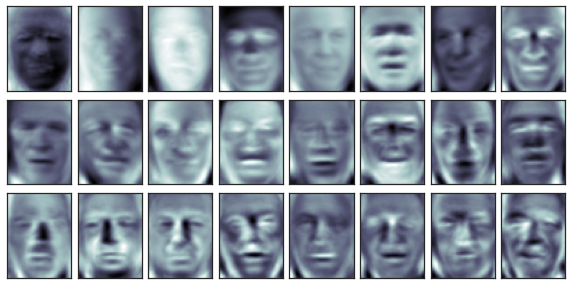

In [137]:
fig , axis = plt.subplots(3,8,figsize=(10,5),subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i , ax in enumerate(axis.flat):
  ax.imshow(pca.components_[i].reshape(62,47),cmap='bone')

Text(0, 0.5, 'cumulative explained variance')

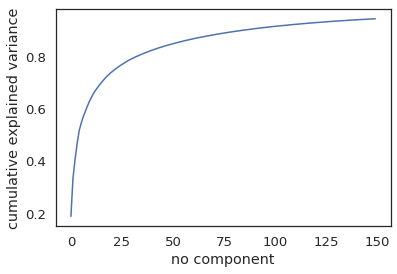

In [139]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("no component")
plt.ylabel("cumulative explained variance")

 we see that these 150 components account for just over 90% of the variance
that would lead us to believe that using 150 components we would recover most of the essential characteristics of the data to make this more concrete we can xompare the input images with the images reconstructed from these 150 components

In [141]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0, 0.5, '150-dim\nreconstruction')

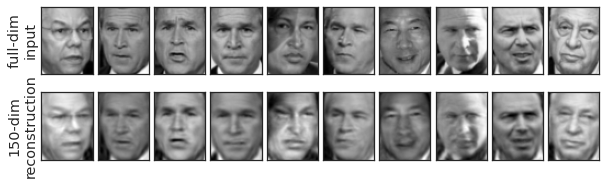

In [145]:
fig , ax = plt.subplots(2,10,figsize=(10,3),subplot_kw={'xticks':[],'yticks':[]},
                        gridspec_kw=dict(hspace=0.1,wspace=0.1)  )
for i in range(10):
  ax[0,i].imshow(faces.data[i].reshape(62,47),cmap='binary_r')
  ax[1,i].imshow(projected[i].reshape(62,47),cmap='binary_r')

ax[0,0].set_ylabel('full-dim\ninput')
ax[1,0].set_ylabel('150-dim\nreconstruction')


/bin/bash: 20: command not found
